# TASK -01

# CodeSoft Internship

# Data Science Tasks : By Vivek Kumar

# Task -01: Use the Titanic dataset to build a model that predicts whether a <br> passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

# Importing the Python libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

Importing the dataset.

In [74]:
tested_data=pd.read_csv('tested.csv',encoding='utf8')
data=tested_data.copy()

# Pandas Dataframes

In [75]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Show first five rows of DataFrame


In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
# show last five row of dataframe
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


By default, the first row of the csv file has been used as column names. We will soon see how to fix that.

In [78]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To see the datatypes of each column we do the following:

In [79]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [80]:
print("Titanic Data Size  :" ,data.size)
print("Titanic Data Shape :" ,data.shape)

Titanic Data Size  : 5016
Titanic Data Shape : (418, 12)


We may get a quick analysis of our data using describe()<br>
Statistical details of Dataframe

In [81]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Visualization of Data 

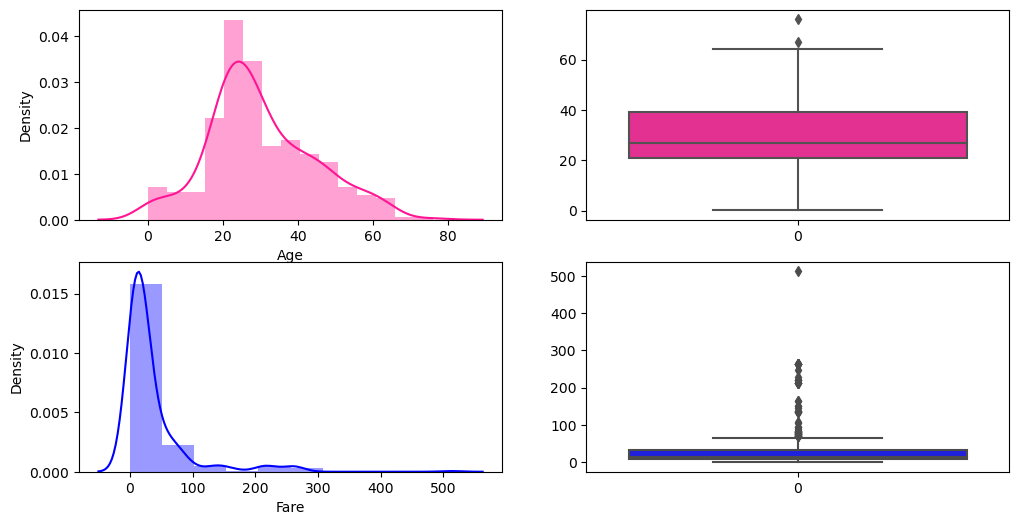

In [82]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.distplot(data['Age'],bins=15,color="deepPink")
plt.subplot(2,2,2)
sns.boxplot(data['Age'],color="deeppink")

plt.subplot(2,2,3)
sns.distplot(data['Fare'],bins=10,color="Blue")
plt.subplot(2,2,4)
sns.boxplot(data['Fare'],color="Blue")

plt.show()

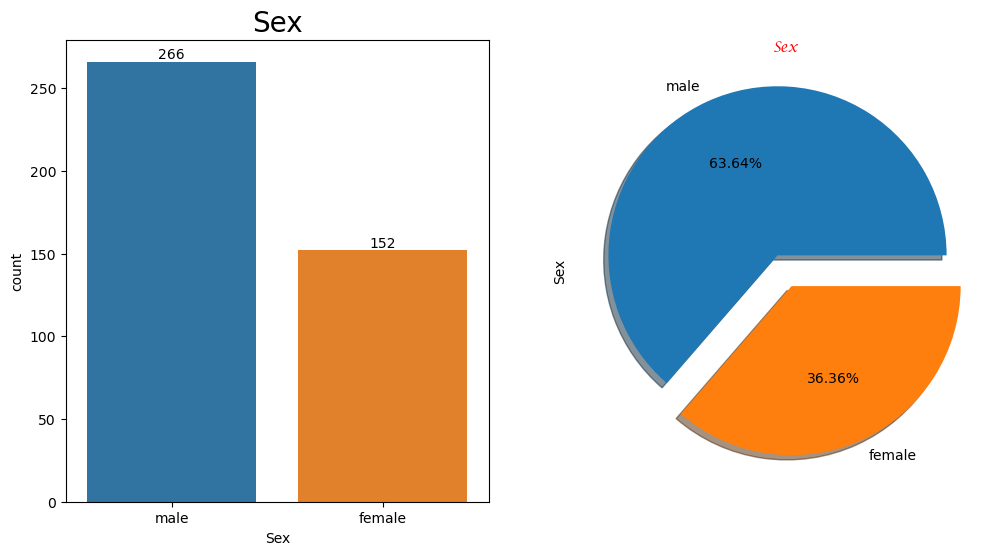

In [53]:
plt.figure(figsize=(12,6))

bound= plt.subplot(1,2,1)
bound = sns.countplot(x='Sex', data=data)
bound.bar_label(bound.containers[0])
plt.title("Sex", fontsize=20)
bound1 =plt.subplot(1,2,2)
bound1=data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
bound1.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

<Axes: xlabel='Survived', ylabel='count'>

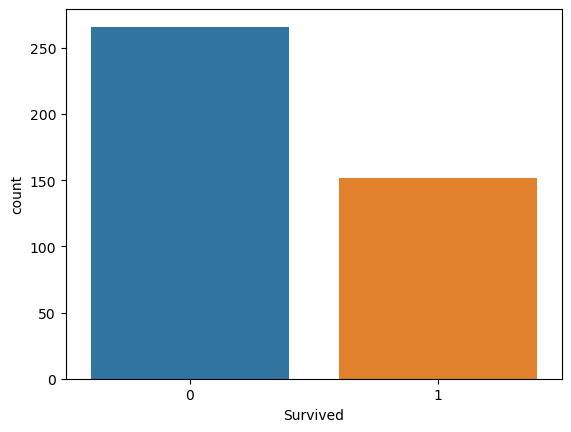

In [54]:
sns.countplot(x='Survived',data=data)

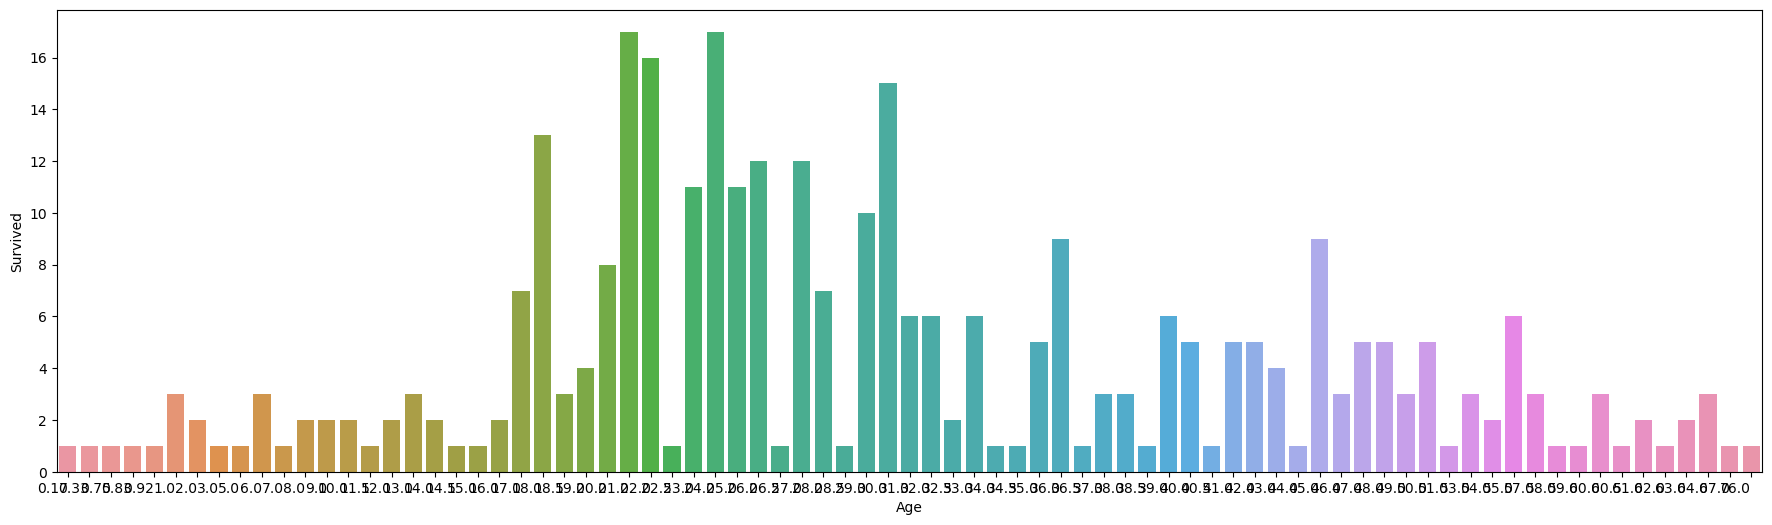

In [55]:
#checking the which age of passenger survived more:
data=data.groupby('Age').agg({'Survived':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
graph =sns.barplot(x='Age', y='Survived', data = data, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

In [94]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# other way to visualise data:  FaceGrid

FaceGrid of Age

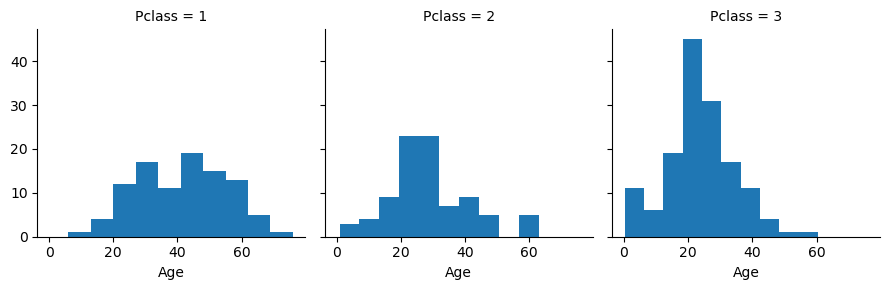

In [28]:
g = sns.FacetGrid(data, col="Pclass")  # it basically make a class 
g = g.map(plt.hist, "Age")

FaceGrid of Embarked : x-label is Age and y-label is Fare

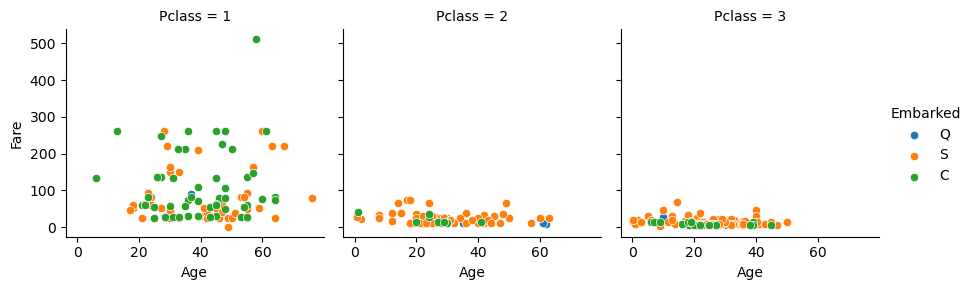

In [36]:
Embark = sns.FacetGrid(data, col="Pclass", hue="Embarked")
Embark.map_dataframe(sns.scatterplot, x="Age", y="Fare")
Embark.add_legend()

plt.show()

FaceGrid of Sex. x-label is Age and y-label=Density

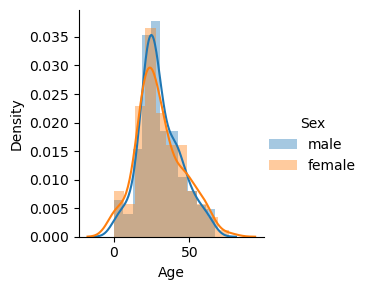

In [43]:
sns.FacetGrid(data, hue='Sex', height=3).map(sns.distplot, 'Age').add_legend()
plt.show()

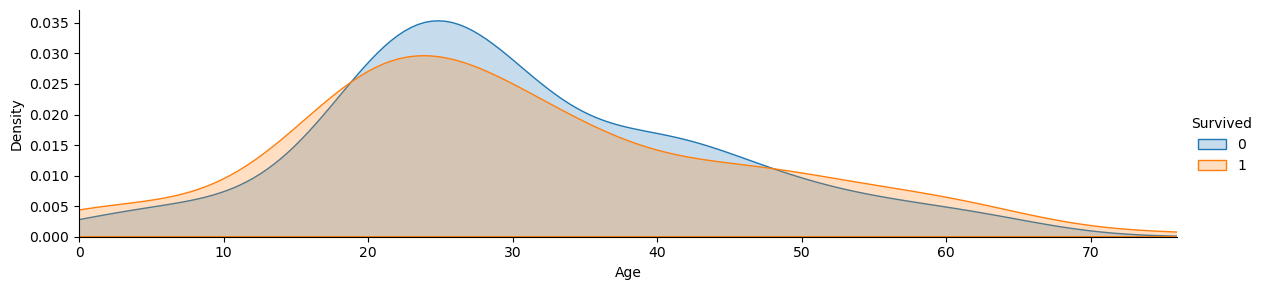

In [45]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

figure = sns.FacetGrid(data, hue="Survived", aspect=4)
figure.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
figure.set(xlim=(0, oldest))
figure.add_legend()
plt.show()

Joint of two plot: joint of Age and fare with Survive Graph

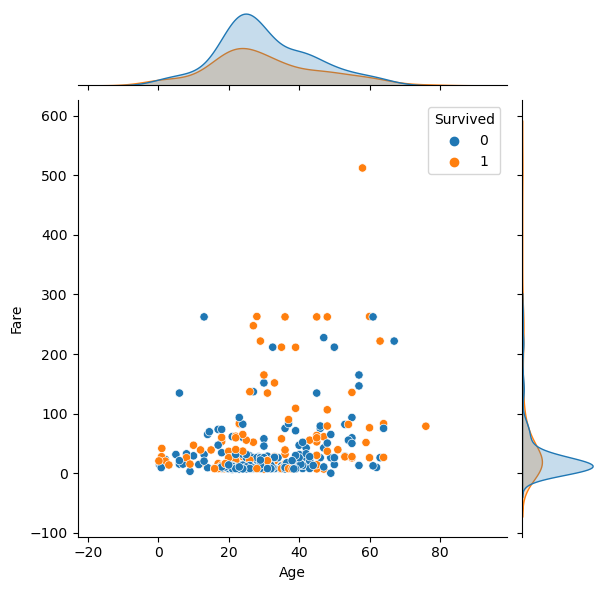

In [46]:
sns.jointplot(x="Age",y="Fare",data=data,color="olive",hue="Survived")
plt.show()

# Visualization of Outliers in Column

<Axes: xlabel='Age'>

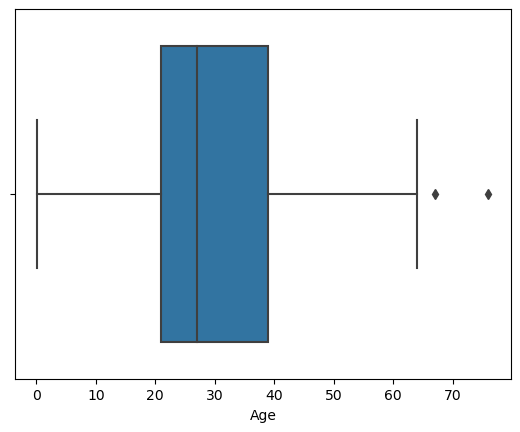

In [83]:
# visualization of outlier in Age column
sns.boxplot(x=data["Age"],showfliers=True)

<Axes: xlabel='Fare'>

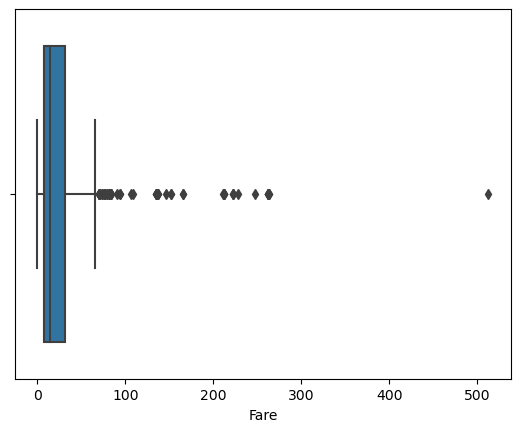

In [84]:
# visualization of outlier in Fare column 
sns.boxplot(x=data['Fare'],showfliers=True)

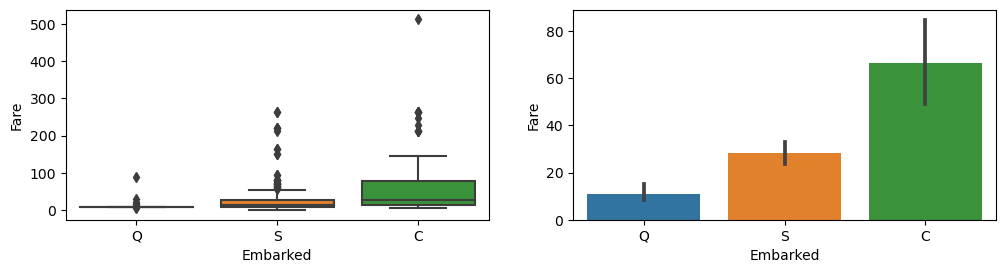

In [58]:
# visualization of outlier in Embarked column with respect to fare
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(y=data['Fare'],x=data['Embarked'],showfliers=True)
plt.subplot(2,2,2)
sns.barplot(y="Fare",x="Embarked",data=data)
plt.show()

# Correlation Analysis

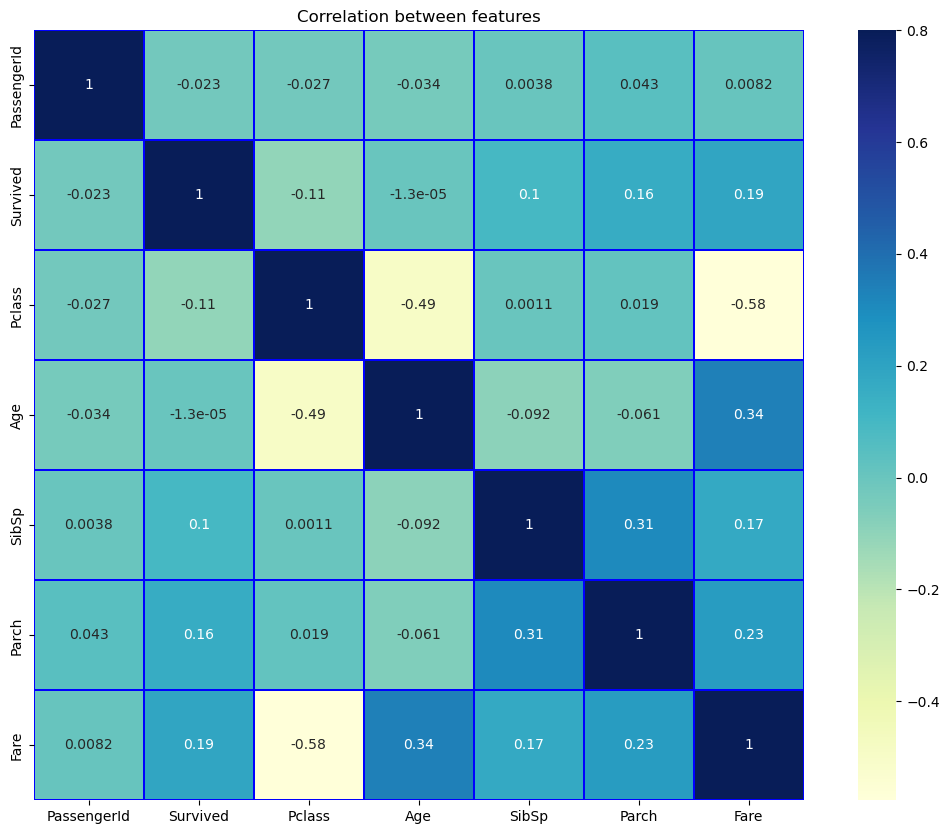

In [85]:
corr=data.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="blue")
plt.title('Correlation between features')
plt.show()

Index(['Pclass', 'Age', 'Fare'], dtype='object')


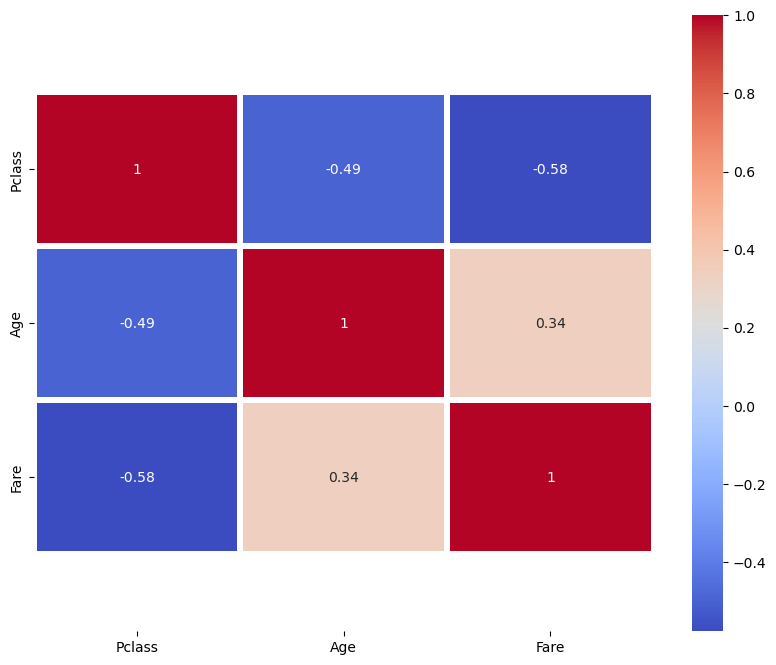

In [86]:
# correlation heatmap of higly correlated features with SalePrice

corr = data.corr()
corr_features = corr.index[abs(corr["Fare"]) >= 0.25]
print(corr_features)

plt.figure(figsize=(10,8))
x_label= sns.heatmap(data[corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = x_label.get_ylim()
x_label.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

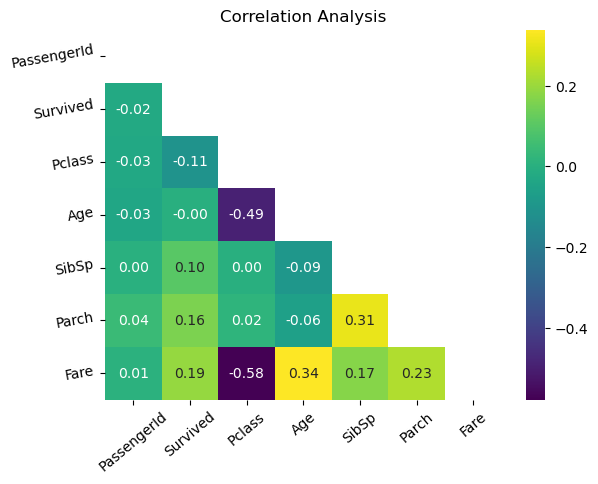

In [87]:
corr = data.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=40)
plt.yticks(rotation = 10)
plt.show()

# Data Preprocessing

# Visualizing the missing data before cleaning data (before removing null value)

<Axes: >

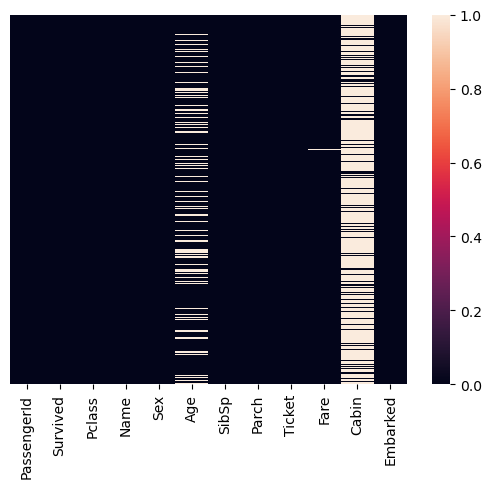

In [88]:
sns.heatmap(data.isnull(), yticklabels=False)   

Counting the No of missing values in each column

In [89]:
data.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Calculating the percentage of missing values in Dataframe

In [90]:
per_mis_data=(data.isnull().sum())/(len(data))
print(per_mis_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


In [91]:
def missing(data):
    missing_number=data.isnull().sum().sort_values(ascending=False)
    missing_percentage=(data.isnull().sum())/(len(data))
    missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing_number','missing_percentage'])
    return missing_values

In [92]:
missing(data)

,missing_number,missing_percentage
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Removing the null value from the titanic data set

In [96]:
data["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [98]:
data.Cabin.mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [99]:
# Filled the missing value in Age column with the mean value
data.Age.fillna(data.Age.mean(),inplace=True)
# Filled the missing value in Fare columns with mean Value
data.Fare.fillna(data.Fare.mean(),inplace=True)
# Filled the missing value in Cabin columns with mode Value
data.Cabin.fillna(data.Cabin.mode()[0],inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


Now check Data has cleaned or not .

In [100]:
def missing(data):
    missing_number=data.isnull().sum().sort_values(ascending=False)
    missing_percentage=(data.isnull().sum())/(len(data))
    missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing_number','missing_percentage'])
    return missing_values

In [101]:
missing(data)  # now my data is cleaned 

,missing_number,missing_percentage
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


<Axes: >

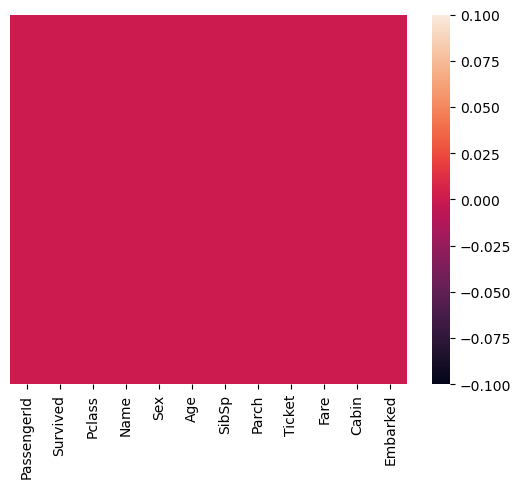

In [102]:
sns.heatmap(data.isnull(), yticklabels=False)   

In [105]:
# now check shape and size of data
print("Shape of titanic data is:",data.shape)
print("size of the titanic data is:",data.size)

Shape of titanic data is: (418, 12)
size of the titanic data is: 5016


# Categorical value is converted into numerical value by using categorical_encode

In [107]:
! pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/81.8 kB ? eta -:--:--
     ---------------                          30.7/81.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------      71.7/81.8 kB 777.7 kB/s eta 0:00:01
     -------------------------------------- 81.8/81.8 kB 761.6 kB/s eta 0:00:00


In [109]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(data)
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,1,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,2,1,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2
2,894,1,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,1,1,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,2,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2


# Splitting Independent and Dependent Variable

In [110]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = data['Survived']

# Splitting train and test set

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [149]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,1071,3,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",2,64.00000,0,2,PC 17756,83.1583,E45,3
201,1093,1,"Danbom, Master. Gilbert Sigvard Emanuel",1,0.33000,0,2,347080,14.4000,B57 B59 B63 B66,2
336,1228,2,"de Brito, Mr. Jose Joaquim",1,32.00000,0,0,244360,13.0000,B57 B59 B63 B66,2
187,1079,1,"Davies, Mr. Joseph",1,17.00000,2,0,A/4 48873,8.0500,B57 B59 B63 B66,2
214,1106,1,"Andersson, Miss. Ida Augusta Margareta",2,38.00000,4,2,347091,7.7750,B57 B59 B63 B66,2
...,...,...,...,...,...,...,...,...,...,...,...
368,1260,3,"Gibson, Mrs. Leonard (Pauline C Boeson)",2,45.00000,0,1,112378,59.4000,B57 B59 B63 B66,3
48,940,3,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",2,60.00000,0,0,11813,76.2917,D15,3
260,1152,1,"de Messemaeker, Mr. Guillaume Joseph",1,36.50000,1,0,345572,17.4000,B57 B59 B63 B66,2
312,1204,1,"Sadowitz, Mr. Harry",1,30.27259,0,0,LP 1588,7.5750,B57 B59 B63 B66,2


In [113]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [114]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,947,1,"Rice, Master. Albert",1,10.0,4,1,382652,29.1250,B57 B59 B63 B66,1
239,1131,3,"Douglas, Mrs. Walter Donald (Mahala Dutton)",2,48.0,1,0,PC 17761,106.4250,C86,3
224,1116,3,"Candee, Mrs. Edward (Helen Churchill Hungerford)",2,53.0,0,0,PC 17606,27.4458,B57 B59 B63 B66,3
376,1268,1,"Kink, Miss. Maria",2,22.0,2,0,315152,8.6625,B57 B59 B63 B66,2
176,1068,2,"Sincock, Miss. Maude",2,20.0,0,0,C.A. 33112,36.7500,B57 B59 B63 B66,2


In [115]:
y_train.head()

179    1
201    0
336    0
187    0
214    1
Name: Survived, dtype: int64

In [116]:
y_test.head()

55     0
239    1
224    1
376    1
176    1
Name: Survived, dtype: int64

In [122]:
print("Shape of X_train data is:",X_train.shape,":::  Size of X_train data is:",X_train.size)
print("Shape of X_test data is:",X_test.shape," :::  Size of X_test data is:",X_test.size)
print("Shape of y_train data is:",y_train.shape,":::  Size of y_train data is:",y_train.size)
print("Shape of y_test data is:",y_test.shape," :::  Size of y_test data is:",X_test.size)

Shape of X_train data is: (292, 11) :::  Size of X_train data is: 3212
Shape of X_test data is: (126, 11)  :::  Size of X_test data is: 1386
Shape of y_train data is: (292,) :::  Size of y_train data is: 292
Shape of y_test data is: (126,)  :::  Size of y_test data is: 1386


In [123]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Cabin           76
Embarked         3
dtype: int64

In [153]:
data["Pclass"] = data["Pclass"].astype('category')
data["Sex"] = data["Sex"].astype('category')
data["Embarked"] = data["Embarked"].astype('category')
data["Survived"] = data["Survived"].astype('category')
X_train["Pclass"] = X_train["Pclass"].astype('category')

In [126]:
X_train.dtypes

PassengerId      int64
Pclass           int32
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [127]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [154]:
#defining numerical columns in data:
numeric_columns=data.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [155]:
cat_column=X_train.select_dtypes(['object','category']).columns
cat_column

Index(['Pclass', 'Name', 'Ticket', 'Cabin'], dtype='object')

# Model Implementation

# Logestic Regression

In [136]:
# Importing the required preprocessing libraries:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

Make a dataframe of numerical testing and trainig data

In [156]:
#standardscaler for numerical columns
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), columns=numeric_columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns)

In [157]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(X_train[cat_column])

columns_ohe = list(ohe.get_feature_names_out(cat_column))

In [158]:
X_train_cat = ohe.transform(X_train[cat_column])
X_test_cat  = ohe.transform(X_test[cat_column])

Make a dataframe of category testing and trainig data

In [159]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

Merge two data X_train_num(training numerical data and training category data and same for testing data

In [160]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [162]:
print("shape and size of x_train data",X_train.shape,X_train.size)
print("shape and size of x_test data",X_test.shape,X_test.size)

shape and size of x_train data (292, 612) 178704
shape and size of x_test data (126, 612) 77112


Import logical Regression

Impliment Confusion Matrix

# Logestic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)
model=logistic_model.fit(X_train, y_train)
y_train_prediction =logistic_model.predict(X_train)
y_test_prediction=logistic_model.predict(X_test)
y_pred = logistic_model.predict(X_test)

print("Training set score: {:.2f}".format(logistic_model.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(logistic_model.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred))

Training set score: 0.90 

Test set score: 0.62 

Accuracy Score: 0.62 

Confusion Matrix: 
 [[72  4]
 [44  6]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.62      0.95      0.75        76
           1       0.60      0.12      0.20        50

    accuracy                           0.62       126
   macro avg       0.61      0.53      0.47       126
weighted avg       0.61      0.62      0.53       126



In [168]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Logistic Regression Accuracy:  61.9%
MAE: 0.38095238095238093
MSE: 0.38095238095238093
RMSE: 0.6172133998483676


# Decision Tree Classifier with criterion entropy

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logistic_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model=logistic_model.fit(X_train, y_train)
y_train_prediction =logistic_model.predict(X_train)
y_test_prediction=logistic_model.predict(X_test)
y_pred =logistic_model.predict(X_test)

print("Training set score: {:.2f}".format(logistic_model.score(X_train,y_train_prediction)))
print("Test set score: {:.2f}".format(logistic_model.score(X_test, y_test_prediction)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test_prediction,y_pred)))
print("Confusion Matrix: \n",confusion_matrix(y_test_prediction,y_pred))
print("Classification_Report: \n",classification_report(y_test_prediction,y_pred))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[90  0]
 [ 0 36]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        36

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# Decision-Trees

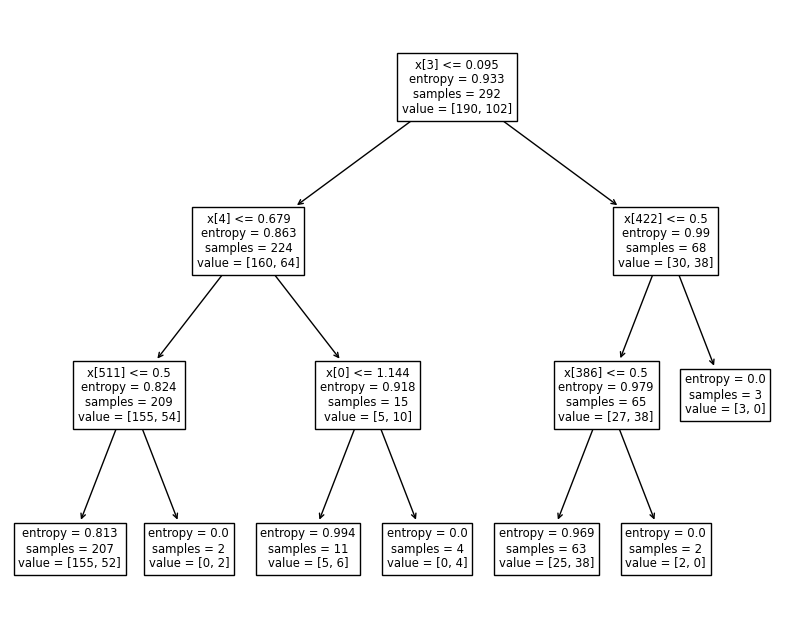

In [178]:
##Visualize decision-trees
plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(logistic_model.fit(X_train, y_train)) 
plt.show()

In [173]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [174]:
final_pred = model.predict(X_test)

In [175]:
final_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [176]:
final_pred=pd.DataFrame(final_pred)

In [177]:
final_pred

,0
0,1
1,1
2,0
3,0
4,0
...,...
121,0
122,1
123,0
124,1
